# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp=pd.read_csv("Temp_States.csv",encoding='cp1252')


#### Print `temp`

In [3]:
print (temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


Tengo 2 columnas que son string y otra columna que es float, el data son las tempreaturas de 7 ciudades. Ademas tenemos datos numericos y categoricos (State)

#### Select the rows where state is New York

In [5]:
# your answer here
NY= temp[temp['State']=='New York']
NY

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here

mean_NY = NY['Temperature'].mean()
mean_NY

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
Temp_that_15 = temp[temp['Temperature']>15] 
Temp_that_15 

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
Temp_that_15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
Temp_less_20 = Temp_that_15[Temp_that_15['Temperature']<=20]
Temp_less_20

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
6,Newark,New Jersey,20.000000


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
mean_temp = Temp_less_20['Temperature'].mean()
std_temp = Temp_less_20['Temperature'].std()

print(mean_temp, std_temp)

18.88888888888889 1.4698618394803282


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# your answer here
employee=pd.read_csv("employee.csv",encoding='cp1252')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


tenemos una data de empleados  donde 5 columnas son string y 2 float, Ademas tenemos datos categoricos como Title, Gender, Education, Department.

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DCD75E50>]],
      dtype=object)

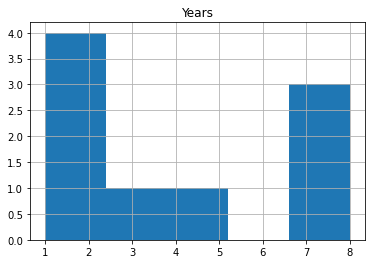

In [13]:
# your answer here
employee.hist('Years', bins='auto')

la mayoria de empleados tiene lleva en la empresa de 1 a 2 años y le siguen 3 empleados con mas de 7 u 8 años

#### What's the average salary in this company?

In [14]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [15]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [16]:
# your answer here
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [17]:
# your answer here
employee[employee['Salary']==30]['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [18]:
# your answer here
employee[employee['Name']=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
# your answer here
employee[employee['Name']=='David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [20]:
# your answer here
employee[employee['Title']=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
# your answer here
employee[(employee.Title =='associate') & (employee.Salary==55)]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
# your answer here
employee.groupby(['Years'])['Salary'].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

desde el punto de la empresa seria el gasto en salario que tuvo por empleado en cada año.

####  What is the average Salary per title?

In [25]:
# your answer here
d = employee.groupby(['Title'])['Salary'].mean()
d

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

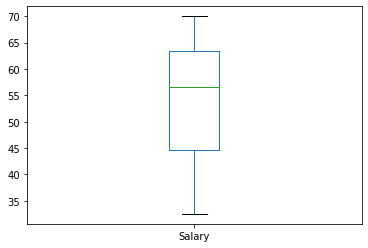

In [26]:
# draw boxplot here

d.plot.box()

In [27]:
# print first quartile here
d.describe()

count     3.000000
mean     53.055556
std      19.009013
min      32.500000
25%      44.583333
50%      56.666667
75%      63.333333
max      70.000000
Name: Salary, dtype: float64

In [28]:
# print third quartile here  / no supe como obtener solo el 3er cuartuile
d.quantile([.25, .5, .75])

0.25    44.583333
0.50    56.666667
0.75    63.333333
Name: Salary, dtype: float64

el grafico representa el salario donde, observamos una linea verde la cual es el percentil 50, y los extremos azules indican los percentiles 25 y 75. con esto podemos observar que existe un 25% que tiene una salario entre 32 y 56, y otro 25% tiene una salario entre 56 y 63


#### Is the mean salary per gender different?

In [29]:
# your answer here
employee.groupby(['Gender'])['Salary'].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

La mean es distinta ya que al agrupar los datos obtengo dos grupos, a diferencia del caso anterior que eran 3 grupos... sin embargo si tuviesen la misma cantidad de grupo probablemente serian distitos porque la mean dependera del numero de salarios que sume en cada grupo

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here
f = employee.groupby(['Department'])['Salary'].describe()
f

,count,mean,std,min,25%,50%,75%,max
Department,,,,,,,,
HR,3.0,45.00,21.794495,30.0,32.50,35.0,52.5,70.0
IT,4.0,48.75,19.311050,30.0,33.75,47.5,62.5,70.0
Sales,2.0,55.00,0.000000,55.0,55.00,55.0,55.0,55.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
# your answer here

f['difference'] = f.apply(lambda row: row['max']-row['min'], axis=1) 
f

#no supe como hacerlo usando la funcion agg

,count,mean,std,min,25%,50%,75%,max,difference
Department,,,,,,,,,
HR,3.0,45.00,21.794495,30.0,32.50,35.0,52.5,70.0,40.0
IT,4.0,48.75,19.311050,30.0,33.75,47.5,62.5,70.0,40.0
Sales,2.0,55.00,0.000000,55.0,55.00,55.0,55.0,55.0,0.0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [32]:
# your answer here
Orders = pd.read_csv('Orders2.csv', encoding = 'cp1252')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [33]:
# your answer here
Orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [34]:
# your answer here
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [35]:
# your answer here
Orders[['Quantity','UnitPrice', 'amount_spent']].describe().round(2)

,Quantity,UnitPrice,amount_spent
count,397924.00,397924.00,397924.00
mean,13.02,3.12,22.39
std,180.42,22.10,309.06
min,1.00,0.00,0.00
25%,2.00,1.25,4.68
50%,6.00,1.95,11.80
75%,12.00,3.75,19.80
max,80995.00,8142.75,168469.60


####  What is the average Purchase Price?

In [36]:
# your answer here
Orders.UnitPrice.mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [37]:
# your answer here
Orders.UnitPrice.max()

8142.75

In [38]:
# your answer here
Orders.UnitPrice.min()

0.0

#### Select all the customers we have in Spain

In [39]:
# your answer here
Orders_spain = Orders[Orders.Country=='Spain']
Orders_spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [40]:
# your answer here
c=Orders_spain.CustomerID.value_counts()
print(c)
print(len(c))


12540    478
12484    346
12539    273
17097    211
12597    206
12502    147
12556    121
12546     69
12462     62
12354     58
12550     57
12541     52
12545     50
12455     48
12421     45
12510     33
12557     33
12596     27
12417     23
12507     22
12448     22
12538     21
12544     19
12454     15
12442     12
12551     10
12547      8
12450      8
12548      5
12445      4
Name: CustomerID, dtype: int64
30


Existen 30 customers

#### Select all the customers who have bought more than 50 items ?

In [60]:
# your answer here
r=Orders_spain.groupby('CustomerID').count()
r[r.Description>=50].index

Int64Index([12354, 12462, 12484, 12502, 12539, 12540, 12541, 12545, 12546,
            12550, 12556, 12597, 17097],
           dtype='int64', name='CustomerID')

#### Select orders from Spain that are above 50 items

In [63]:
# your answer here
r2=Orders_spain.groupby(['CustomerID', 'InvoiceNo']).count()
r2[r2.Quantity>50].index

MultiIndex([(12354, 550911),
            (12484, 540469),
            (12484, 557007),
            (12484, 564734),
            (12484, 574550),
            (12539, 540550),
            (12539, 542303),
            (12550, 567653),
            (12556, 559665),
            (12556, 572065),
            (12597, 573362),
            (17097, 581193)],
           names=['CustomerID', 'InvoiceNo'])

#### Select all free orders

In [43]:
# your answer here

Orders_spain[Orders_spain.UnitPrice==0]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
197173,282912,561669,22960,2011,7,4,17,jam making set with jars,11,2011-07-28 17:09:00,0.0,12507,Spain,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [44]:
# your answer here

d = Orders_spain[Orders_spain['Description'].str.match('.*lunch bag.*')== True]
d

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
29846,48580,540469,22382,2011,1,5,14,lunch bag spaceboy design,6,2011-01-07 14:04:00,1.65,12484,Spain,9.90
29847,48581,540469,20727,2011,1,5,14,lunch bag black skull.,6,2011-01-07 14:04:00,1.65,12484,Spain,9.90
29848,48582,540469,22384,2011,1,5,14,lunch bag pink polkadot,6,2011-01-07 14:04:00,1.65,12484,Spain,9.90
29849,48583,540469,20725,2011,1,5,14,lunch bag red retrospot,4,2011-01-07 14:04:00,1.65,12484,Spain,6.60
29850,48584,540469,20728,2011,1,5,14,lunch bag cars blue,5,2011-01-07 14:04:00,1.65,12484,Spain,8.25


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [45]:
# your answer here
d[d['year']==2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
29846,48580,540469,22382,2011,1,5,14,lunch bag spaceboy design,6,2011-01-07 14:04:00,1.65,12484,Spain,9.90
29847,48581,540469,20727,2011,1,5,14,lunch bag black skull.,6,2011-01-07 14:04:00,1.65,12484,Spain,9.90
29848,48582,540469,22384,2011,1,5,14,lunch bag pink polkadot,6,2011-01-07 14:04:00,1.65,12484,Spain,9.90
29849,48583,540469,20725,2011,1,5,14,lunch bag red retrospot,4,2011-01-07 14:04:00,1.65,12484,Spain,6.60
29850,48584,540469,20728,2011,1,5,14,lunch bag cars blue,5,2011-01-07 14:04:00,1.65,12484,Spain,8.25
79735,121332,546755,22383,2011,3,3,13,lunch bag suki design,10,2011-03-16 13:29:00,1.65,12502,Spain,16.50
85470,129710,547387,22384,2011,3,2,16,lunch bag pink polkadot,10,2011-03-22 16:00:00,1.65,12539,Spain,16.50
85471,129711,547387,22383,2011,3,2,16,lunch bag suki design,10,2011-03-22 16:00:00,1.65,12539,Spain,16.50
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50
91156,136768,547972,22384,2011,3,1,16,lunch bag pink polkadot,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Show the frequency distribution of the amount spent in Spain.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E0DD330F40>]],
      dtype=object)

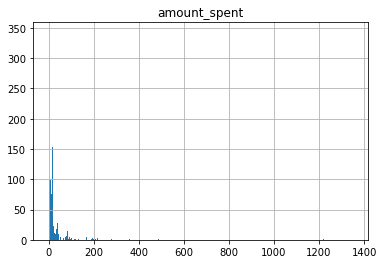

In [46]:
# your answer here
Orders_spain.hist('amount_spent', bins='auto')

(0.0, 50.0)

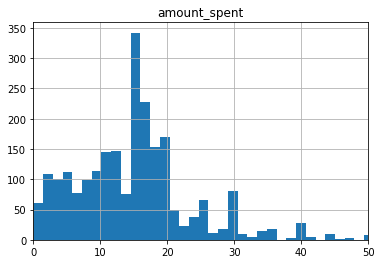

In [47]:
# your answer here
Orders_spain.hist('amount_spent', bins='auto')
plt.xlim(0, 50)

#### Select all orders made in the month of August

In [48]:
# your answer here
y = Orders[Orders.month==8]
y

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [49]:
# your answer here
y.groupby('Country')['InvoiceNo'].value_counts()

Country         InvoiceNo
Australia       563614       97
                563179       10
Austria         562602       58
                563749       30
Belgium         562034       39
                             ..
United Kingdom  564871        1
                564898        1
                564966        1
Unspecified     564051       16
                563947        7
Name: InvoiceNo, Length: 1281, dtype: int64

#### What's the  average amount of money spent by country

In [50]:
# your answer here
y.groupby('Country')['amount_spent'].mean()

Country
Australia          210.179439
Austria             17.228182
Belgium             18.319691
Canada              10.312000
Channel Islands     34.977000
Denmark             13.321875
EIRE                28.612782
Finland             22.565574
France              24.272337
Germany             24.177069
Iceland             26.586818
Israel              28.501813
Italy               20.957368
Malta               20.345455
Netherlands        144.027893
Norway              26.309221
Poland              23.635294
Portugal            29.790244
Spain               13.281389
Sweden              35.021500
Switzerland         18.613820
United Kingdom      21.573396
Unspecified         23.088261
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [51]:
# your answer here
Orders[Orders.UnitPrice==Orders.UnitPrice.max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [52]:
# your answer here
Orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64